# ΣΤΟΧΑΣΤΙΚΑ ΣΗΜΑΤΑ ΚΑΙ ΣΥΣΤΗΜΑΤΑ
## ΘΕΜΑ ΕΞΑΜΗΝΟΥ
### ΑΛΕΞΑΝΔΡΟΣ ΔΗΜΑΣ
### Α.Μ.: 1054531

## Τμήμα Α - προκαταρκτικά

In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

Αρχικά φορτώνουμε τα δεδομένα σε μορφή DataFrame.

In [28]:
df = pd.read_csv('data.csv', names=['Index', 'In', 'Out'])  # data gets saved as dataframe format
print(df)

n = len(df['Out'])
out = pd.Series.tolist(df['Out'])  # make list out of column
inp = pd.Series.tolist(df['In'])
index = pd.Series.tolist(df['Index'])
m_est_out = sum(out)/n  # mean estimate
m_est_in = sum(inp)/n  # mean estimate

      Index        In       Out
0         1  0.318740  0.415130
1         2 -0.680820 -0.142700
2         3  0.791050  1.000000
3         4 -0.671660 -0.044671
4         5 -0.076757  0.224400
...     ...       ...       ...
4995   4996 -0.023121 -0.087543
4996   4997  0.008927 -0.197530
4997   4998  0.067680 -0.160930
4998   4999 -0.087975 -0.221440
4999   5000  0.037415  0.007356

[5000 rows x 3 columns]


### Α1. Προκαταρκτικά

Σημειώστε το μήκος του σήματος (τιμές-samples) και την περίοδο δειγματοληψίας.Δημιουργείστε γράφημα του σήματος συναρτήσει του χρόνου. Καταγράψτε τις παρατηρήσεις σας.

In [29]:
print('The length of the data is: ' + str(n))

The length of the data is: 5000


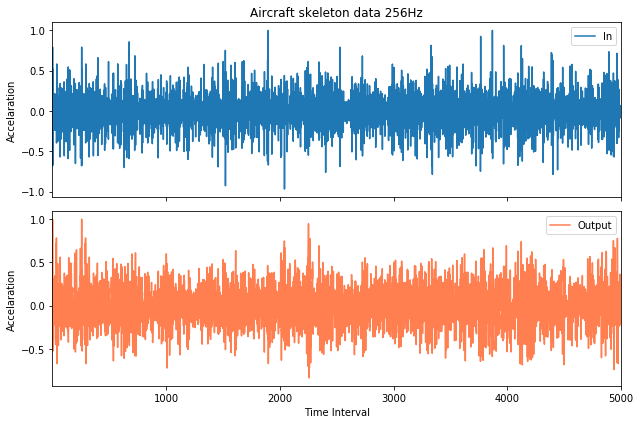

In [31]:
fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, sharex=True,figsize = (9,6))
# INPUT PLOT
ax1.plot(df['In'], label = 'In')
#ax1.set_xlim(1, 5000)
ax1.set_ylabel('Accelaration')
ax1.set_xlim(index[0], index[-1])
ax1.set_title('Aircraft skeleton data 256Hz')
ax1.legend()

ax2.plot(df['Out'], color  = 'coral', label = 'Output')
#ax2.set_xlim(1, 5000)
ax2.set_ylabel('Accelaration')
ax2.set_xlabel('Time Interval')  # Check "Interval", Should time be used from frequency (256hz)
ax2.legend()
plt.tight_layout()
# plt.savefig('in_out_show.png', dpi = 100)


### Α2. Κανονικοποίηση

Εαν -και μόνο εαν -το σήμα φαίνεται στάσιμο, εκτιμείστε την μέση τιμή και αφαιρέστε την από το σήμα (κεντράρισμα). Μπορείτε να χρησιμοποιήσετε την εντολή `detrend' του MATLAB.Εαν οι τιμές του σήματος είναι πολύ μεγάλες ή πολύ μικρές (σε σχέση με την μονάδα) συνίσταται -γιααριθμητικούς λόγους -να γίνει κανονικοποίηση.  Για τον σκοπό αυτό εκτιμείστε την διασπορά του σήματος και διαιρέστε ολόκληρο το σήμα με την εκτιμηθείσα τυπική απόκλιση (τεταργωνική ρίζα της διασποράς).

In [6]:
out_center = []  # initialize empty list
in_center = []
for i in range(0,5000):  # fill list
    out_center.append(out[i] - m_est_out)  # center data
    in_center.append(inp[i]-m_est_in)


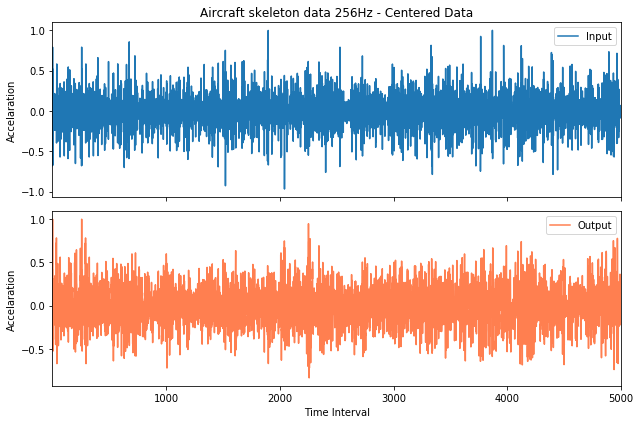

In [33]:
# CENTERED FIGURE
fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, sharex=True, figsize = (9,6))
# INPUT PLOT
ax1.plot(in_center, label = 'Input')
#ax1.set_xlim(1, 5000)
ax1.set_ylabel('Accelaration')
ax1.set_title('Aircraft skeleton data 256Hz - Centered Data')
ax1.set_xlim(index[0], index[-1])
ax1.legend()

ax2.plot(out_center, color  = 'coral', label = 'Output')
#ax2.set_xlim(1, 5000)
ax2.set_ylabel('Accelaration')
ax2.set_xlabel('Time Interval')  # Check "Interval", Should time be used from frequency (256hz)
ax2.legend()
plt.tight_layout()
# plt.savefig('in_out_show.png', dpi = 100)

Δεν χρειάζεται κανονικοποίηση ως προς τις τιμές εξόδου.

### Α3. Προκαταρκτική ανάλυση στο πεδίο χρόνου

Δημιουργείστε γράφημα του σήματος, καθώς επίσης και για τμήματά του.Κατ' αρχήν εξέταση της κανονικότηταςτου σήματος μέσω ιστογράμματος (εμπειρική συνάρτηση πυκνότητας πιθανότητας, αριθμός bins) καιnormalprobabilityplot. Εκτιμείστε την λοξότητα (skewness-ροπή 3ης τάξης).Σημειώνεται ότι για κανονική κατανομή οι περιττές ροπές (πέραν της 1ης) είναι μηδενικές.Κατ ́αρχήν εξέταση αυτοσυμμεταβητότητας(δυναμικότητας) στο σήμα μέσω scatterdiagramsτου τύπου -(. Τοποθετείστε τα διαγράμματα αυτά σε μια συγκεντρωτική εικόνα με subplots.Καταγράψτε τις παρατηρήσεις σας.

<class 'matplotlib.axes._subplots.AxesSubplot'>


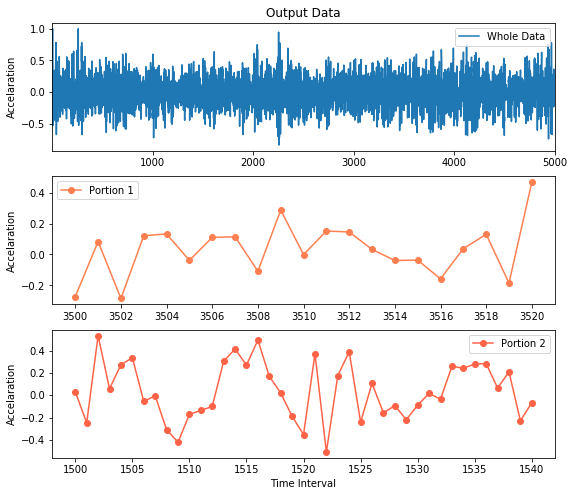

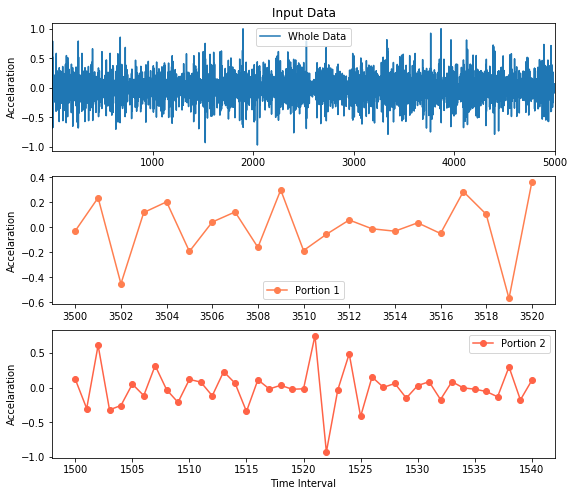

In [34]:
def portions(x):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize=(9, 8))
    ax1.plot(x, label = 'Whole Data')
    ax1.set_xlim(index[0], index[-1])

    if x == out:
        ax1.set_title('Output Data')
    else:
        ax1.set_title('Input Data')
    
    ax1.set_ylabel('Accelaration')
    ax1.legend()
    
    ax2.plot(x[3500:3521], 'o-',color = 'coral', label = 'Portion 1')  # FIX XTICKS
    ax2.set_ylabel('Accelaration')
    ax2.set_xticks(np.arange(0,21,2))
    ax2.set_xticklabels(np.arange(3500,3521,2))
    ax2.legend()

    ax3.plot(x[1500:1541], 'o-', color = 'tomato', label = 'Portion 2')  # FIX XTICKS
    ax3.set_xlabel('Time Interval')
    ax3.set_ylabel('Accelaration')
    ax3.set_xticks(np.arange(0,41,5))
    ax3.set_xticklabels(np.arange(1500,1541,5))
    ax3.legend()
    # plt.savefig('porsion.png', dpi = 100)

portions(out)
portions(inp)
print(type(ax1))

In [39]:
mu1 = m_est_in
mu2 = m_est_out

# use numpy built in function
var = (pd.DataFrame.var(df))
print(var)
sigma1 = math.sqrt(var[1])  # standard deviation
sigma2 = math.sqrt(var[2])

x = np.linspace(-1, 1, 100)

Index    2.083750e+06
In       3.856698e-02
Out      5.284970e-02
dtype: float64


Text(0.5, 0, 'Output Value')

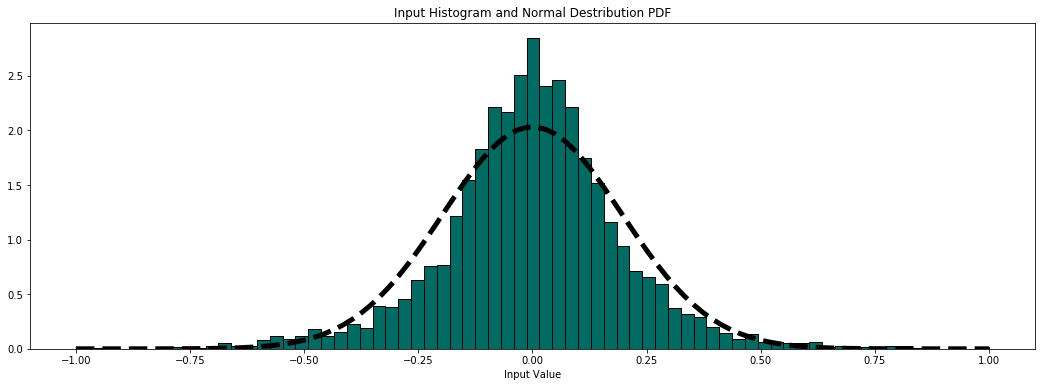

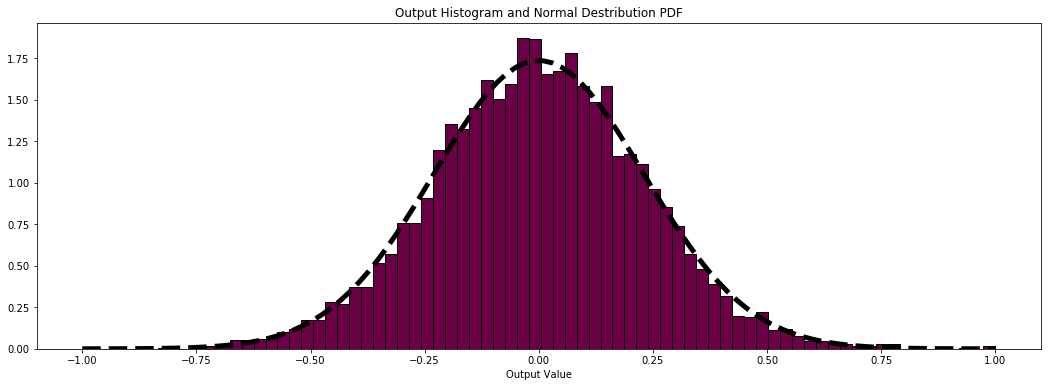

In [40]:
plt.figure(num=5, figsize=(18, 6))  # histogram
plt.hist(inp, bins=int(np.sqrt(n)),edgecolor='black', density='True', color = '#006B62')
plt.plot(x, (1 / (sigma1 * np.sqrt(2 * np.pi))) * np.exp(-1 / 2 * ((x - mu1) / sigma1) ** 2),'--', linewidth=5, color = 'black')  # normal destribution pdf
plt.title('Input Histogram and Normal Destribution PDF')
plt.xlabel('Input Value')
# _ = plt.savefig('hist_IN.png', dpi = 100)
        
plt.figure(num=6, figsize=(18, 6))  # histogram
plt.hist(out, bins=int(np.sqrt(n)),edgecolor='black', density='True', color = '#6B0047')
plt.plot(x, (1 / (sigma2 * np.sqrt(2 * np.pi))) * np.exp(-1 / 2 * ((x - mu2) / sigma2) ** 2),'--' ,linewidth=5, color = 'black')  # normal destribution pdf         
plt.title('Output Histogram and Normal Destribution PDF')        
plt.xlabel('Output Value')
# _ = plt.savefig('hist_OUT.png', dpi = 100)

Παρατηρούμε ότι οι τιμές εξόδου ακολουθούν κανονική κατανομή.

In [11]:
print('Skewness for Input is estimated as: ' + str(df['In'].skew().round(4)))
print('Skewness for Output is estimated as: ' + str(df['Out'].skew().round(4)))

Skewness for Input is estimated as: -0.0253
Skewness for Output is estimated as: 0.028


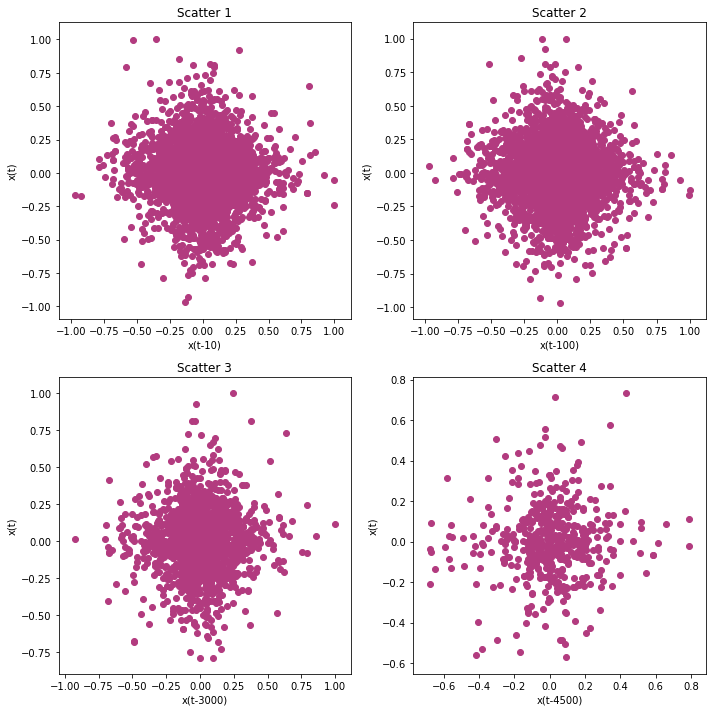

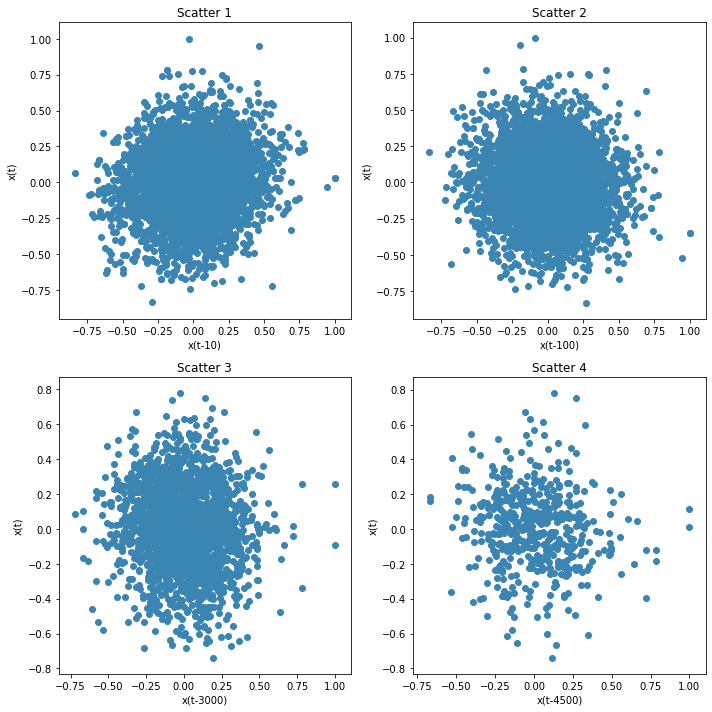

In [61]:
def scat_k(x,col): 
    r = 1
    plt.figure(figsize = (10,10))
    for k in [10,100,3000,4500]:
        plt.subplot(2,2,r)
        plt.xlabel('x(t-' + str(k) + ')')
        plt.ylabel('x(t)')
        plt.title('Scatter ' + str(r))
        r+=1
        
        l=0
        m=k
        while m<len(out)-1:
            plt.scatter(x[l],x[m], color = col)
            l+=1
            m+=1
        plt.tight_layout()
        
scat_k(inp, '#B23B7F')
scat_k(out, '#3B85B2')

## Τμήμα Β-μη παραμετρική ανάλυση

### Β1. Μη παραμετρική ανάλυση στο πεδίο χρόνου

##### About ρ
The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

#### Calculating cross correlation between input - output

In [12]:
#calculating correlation between input - output
from scipy.stats import pearsonr

corr, _ = pearsonr(inp, out)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.497


#### Using Matplotlib build in function to plot autocorrelation

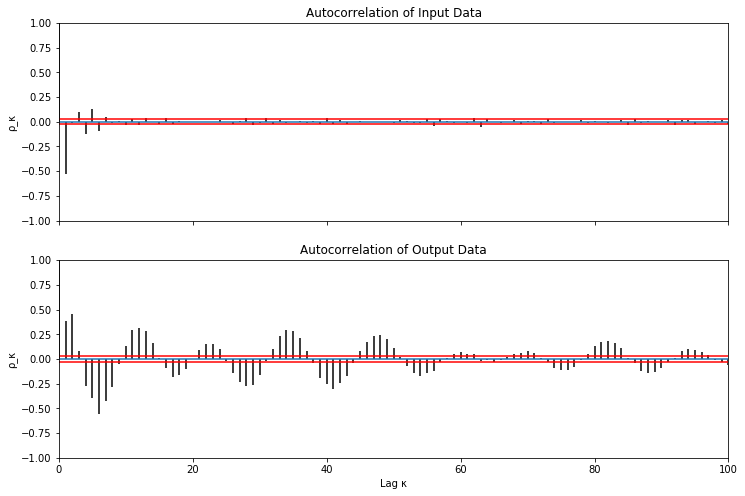

<Figure size 864x576 with 0 Axes>

In [13]:
fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (12,8))
_ = ax1.acorr(inp, maxlags = 100)

x = np.linspace(0,101)
a = 1.96/np.sqrt(n)
_ = ax1.plot(x, a*x**0, x, -a*x**0, color = 'red')
ax1.set_xlim(0,100)
ax1.set_ylim(-1,1)
ax1.set_xlim(0, 100)
ax1.set_ylabel('ρ_κ') ### use latex
ax1.set_title('Autocorrelation of Input Data')

plt.figure(figsize = (12,8))
_ = ax2.acorr(out, maxlags = 100)
_ = ax2.plot(x, a*x**0, x, -a*x**0, color = 'red')
ax2.set_xlim(0,100)
ax2.set_ylim(-1,1)
ax2.set_ylabel('ρ_κ') ### use latex
ax2.set_title('Autocorrelation of Output Data')
ax2.set_xlabel('Lag κ') ### use latex
plt.tight_layout()

#### Παρατηρήσεις
Παρατηρούμε ότι στο σήμα εισόδου εμφανίζεται ισχυρή αυτοσυσχέτηση για μικρές τιμές της χρονικής καθυστέρησης. Άρα έχουμε συσχέτιση μεταξύ τιμών του σήματος οι οποίες βρίσκονται αρκετά κοντά. Για το σήμα εισόδου όχι μονό παρατηρούμε ισχυρή συσχέτιση σε όλο το μήκος των τιμών της χρονικής καθυστέρησης αλλά παρατηρούμε ότι υπάρχει περιοδικότητα στο σήμα εξόδου του συστήματος κάτι το αναμενόμενο. Ωστόσο η συσχέτιση αυτή δείχνει να φθίνει όσο η καθυστέρηση αυξάνεται κάτι το οποίο επαληθεύεται επίσης από φυσική άποψη.

#### Some useful resources
 https://matplotlib.org/3.2.1/tutorials/text/usetex.html

 Lines can be fixed using Line2D property
 
 https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.acorr.html

#### Costum autocorrelation function

In [14]:
# to do

### Β2. Μη παραμετρική ανάλυση στο πεδίο συχνοτήτων

Sample frequency Is: 0.0512Hz


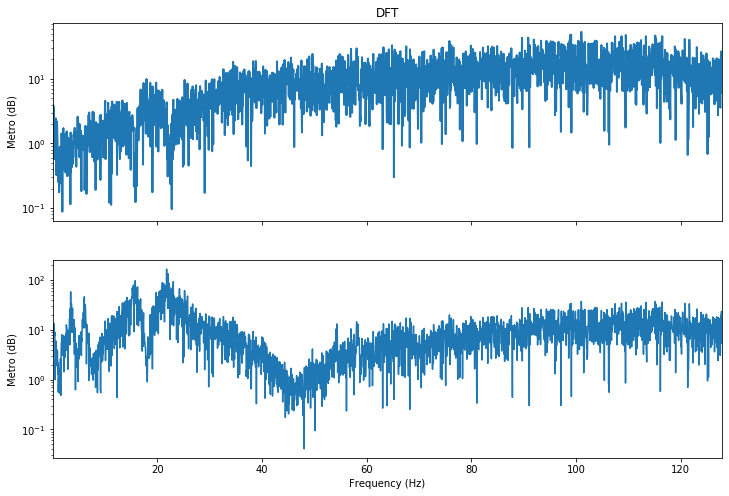

In [42]:
# plt.rcParams['figure.figsize'] = [12, 12]
# plt.rcParams.update({'font.size'}: 18))
samp_freq = 256

#DFT
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize =(12,8))
fft1 = np.fft.fft(inp,n)
fft1_av = np.abs(fft1)

freq = samp_freq/n * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype = 'int')
ax1.plot(freq[L],fft1_av[L], LineWidth = 2)
ax1.set_xlim(freq[L[0]], freq[L[-1]])
ax1.set_yscale('log')
ax1.set_title('DFT')
ax1.set_ylabel("Metro (dB)")

fft2 = np.fft.fft(out,n)
fft2_av = np.abs(fft2)
ax2.plot(freq[L],fft2_av[L])
ax2.set_yscale('log')
ax2.set_ylabel("Metro (dB)")
ax2.set_xlabel("Frequency (Hz)")

df = (samp_freq/n)
print('Sample frequency Is: ' + str(df) + 'Hz')

#Periogram

### Β3. Έλεγχος στασιμότητας 

## Τμήμα Γ-παραμετρική ανάλυση AR

### Γ1. Προκαταρκτικά 

### Γ2. Εκτίμηση μοντέλων AR

### Γ3. Έλεγχος εγκυρότητας του επιλεγέντος μοντέλου AR

### Γ4. Ανάλυση του επιλεγέντος μοντέλου AR

### Γ5. Πρόβλεψη βάσει του επιλεγέντος μοντέλου AR